In [1]:
# Dependencies
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import calendar
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from datetime import datetime

In [2]:
def distance(row):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = row['pickup_latitude'], row['pickup_longitude']
    lat2, lon2 = row['dropoff_latitude'], row['dropoff_longitude']
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [3]:
test_data = pd.read_csv("Resources/test.csv")
#full_data = pd.read_csv("Resources/train.csv")
#sample_data = full_data.sample(n=20000)
#sample_data.tail()
#sample_data.to_csv("Resources/sample.csv")

In [4]:
data_df = pd.read_csv("Resources/sample.csv")
data_df.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
19995,18577093,2011-04-26 10:01:00.000000186,4.10,2011-04-26 10:01:00 UTC,-73.981243,40.774312,-73.983778,40.767743,3
19996,53404964,2014-10-01 21:41:34.0000004,28.50,2014-10-01 21:41:34 UTC,-74.007112,40.718224,-73.934912,40.798347,1
19997,8754196,2013-08-18 19:56:05.0000002,34.33,2013-08-18 19:56:05 UTC,-73.863623,40.769963,-73.993245,40.736136,1
19998,27909592,2009-10-02 19:45:00.000000283,5.70,2009-10-02 19:45:00 UTC,-73.984912,40.759793,-73.991323,40.749993,2
19999,33205722,2013-06-10 07:14:54.0000001,21.00,2013-06-10 07:14:54 UTC,-73.992033,40.768967,-73.980294,40.714079,1


In [5]:
data_df['new_time'] = (data_df['pickup_datetime']).apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S %Z"))    
data_df = data_df.drop(['Unnamed: 0','key','pickup_datetime'], axis=1)
time_range = (data_df['new_time'] > "2013-01-01") & (data_df['new_time'] < "2016-12-31")
ranged_data = data_df.loc[time_range]



In [6]:
ranged_data['distance'] = data_df.apply(distance, axis=1)



/Users/saurabhgoyal/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


/Users/saurabhgoyal/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/saurabhgoyal/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/saurabhgoyal/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,new_time,distance,year,hour_of_day,day,date
17394,164.00,-73.791767,40.645247,-73.170843,40.815057,1,2013-10-17 23:25:40,55.623376,2013,23,Thursday,2013-10-17
6264,155.33,-73.932869,40.802784,-73.704229,41.069109,1,2013-10-10 17:59:19,35.296732,2013,17,Thursday,2013-10-10
10913,63.50,-73.990143,40.734818,-73.853035,41.005966,1,2015-01-17 05:03:54,32.279304,2015,5,Saturday,2015-01-17
14601,92.83,-73.790132,40.643892,-73.861420,40.920487,1,2014-08-01 15:22:00,31.336167,2014,15,Friday,2014-08-01
8548,85.33,-73.977364,40.747105,-73.636200,40.724812,1,2015-01-16 23:41:46,28.851469,2015,23,Friday,2015-01-16
8236,57.33,-73.788466,40.647304,-73.932000,40.853520,1,2013-06-23 01:20:04,25.922597,2013,1,Sunday,2013-06-23
10028,77.66,-73.776737,40.645377,-74.075145,40.600412,2,2013-05-28 06:04:00,25.676588,2013,6,Tuesday,2013-05-28
8735,57.33,-73.788170,40.641532,-73.952670,40.825812,1,2014-03-10 17:54:00,24.738485,2014,17,Monday,2014-03-10
1532,57.33,-73.949172,40.828422,-73.786327,40.644197,1,2014-03-16 14:29:00,24.655243,2014,14,Sunday,2014-03-16
5368,57.54,-73.781067,40.645149,-73.958008,40.811047,2,2015-06-09 21:18:58,23.719102,2015,21,Tuesday,2015-06-09


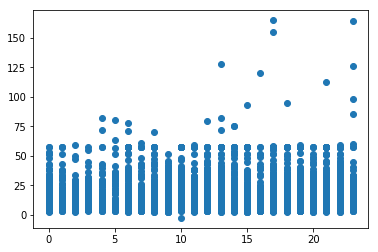

In [14]:
ranged_data['year'] = data_df['new_time'].apply(lambda x: x.year)
ranged_data['hour_of_day'] = data_df['new_time'].apply(lambda x: x.hour)
ranged_data['day'] = data_df['new_time'].apply(lambda x: calendar.day_name[x.weekday()])
ranged_data['date'] = data_df['new_time'].apply(lambda x: x.date())
ranged_data.tail()
plt.scatter(ranged_data['hour_of_day'],ranged_data['fare_amount'])

ranged_data = ranged_data[ranged_data['distance'] < 100]
ranged_data.sort_values(by=['distance'], ascending = False)

In [15]:
dummied_data = ranged_data

for column in dummied_data.columns:
 if dummied_data[column].dtype==object:
  dummyCols=pd.get_dummies(dummied_data[column])
  dummied_data=dummied_data.join(dummyCols)
  del dummied_data[column]

fares = dummied_data['fare_amount']
dummied_data.drop(['fare_amount','pickup_longitude', 'pickup_latitude','dropoff_longitude','new_time'], axis=1,inplace=True)


model_1=LinearRegression()
model_1.fit(dummied_data,fares)
coefficients=pd.DataFrame({'name':list(dummied_data),'value':model_1.coef_})
print("Mean squared error:",np.mean((model_1.predict(dummied_data) - fares) ** 2))
print("R²:",model_1.score(dummied_data, fares))

Mean squared error: 24.977774208489492
R²: 0.7963060302006232
